<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

## DS-SF-42 | 05 | Hypothesis Testing

---

### Learning Objectives
- Understand the fundamental concepts of Frequentist hypothesis testing
- Understand the difference between the null and alternative hypothesis
- Apply an understanding of statistical hypothesis testing within the context of split testing.
- Apply the independent samples t-test
- Apply the chi-squared test of independence to "winner" a split test.
- Understand the relationship between p-values, alpha thresholds, and statistical significance.



In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Performing a T-test in Python (with a discussion of Type II error)

---

Recall that Z-test only works when you know the population mean and standard devation, which is rarely the case. Often it's only possible to compare two independent samples. The most basic scenario is one control and one treatment group. If the outcome between the two is sufficiently large, then it is reasonable to deem the null-hypothesis impropable enough to reject.

**EXAMPLE:** _Are DS part-time students taller than DSI students?_

We might collect data on two classes, of thirty students each

In [11]:
#generate data
fulltime = np.array([69., 69., 63., 65., 65., 67., 59., 63., 70., 59., 67., 64., 72.,
                    70., 65., 65., 65., 64., 65., 66., 63., 63., 62., 66., 62., 66.,
                    66., 64., 71., 68.])

parttime = np.array([74., 72., 61., 65., 65., 70., 64., 66., 65., 67., 67., 69., 73.,
                     73., 71., 66., 65., 76., 63., 67., 67., 69., 61., 62., 62., 67.,
                     59., 66., 62., 68.])
#since GA doesnt give the mean we need to figure it out on our own
#note that the data is in inchs

> ### <font color=blue>Partner Practice</font> - Activity: What do you make of these data? Is there a real difference? How certain can you be? Use descriptive statistics, plotting, or any other tools you think might be useful.

In [30]:
pd.df1 = fulltime
pd.df2 = parttime
#then what did this do? are these two seperate data frames? 

In [34]:
pd.df1.mean()

65.433333333333337

In [35]:
pd.df2.mean()

66.733333333333334

In [36]:
pd.df1.mode()
#why doesn't this work??


AttributeError: 'numpy.ndarray' object has no attribute 'mode'

In [40]:
heights = pd.DataFrame([fulltime,parttime], index=["fulltime","parttime"]).T
#created a combined DF and used .T to transpose it (shift)

In [41]:
# Investigate here
heights.describe()

,fulltime,parttime
count,30.000000,30.000000
mean,65.433333,66.733333
std,3.169720,4.209458
min,59.000000,59.000000
25%,63.250000,64.250000
50%,65.000000,66.500000
75%,67.000000,69.000000
max,72.000000,76.000000


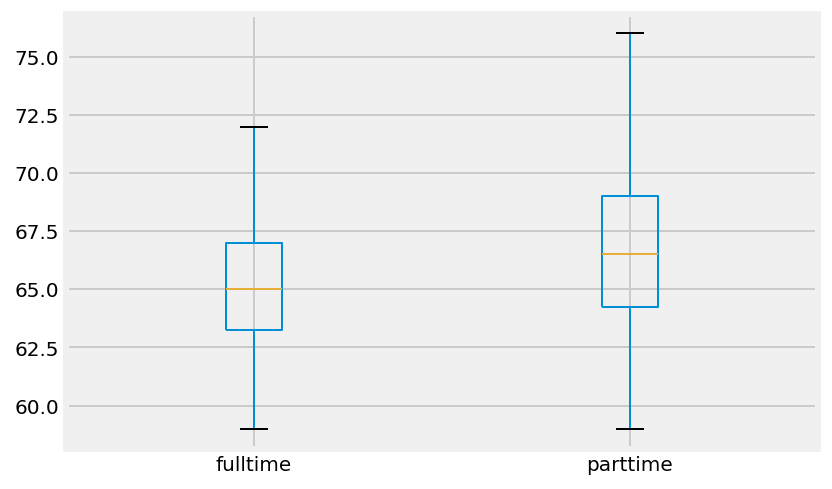

In [42]:
heights.plot(kind="box")

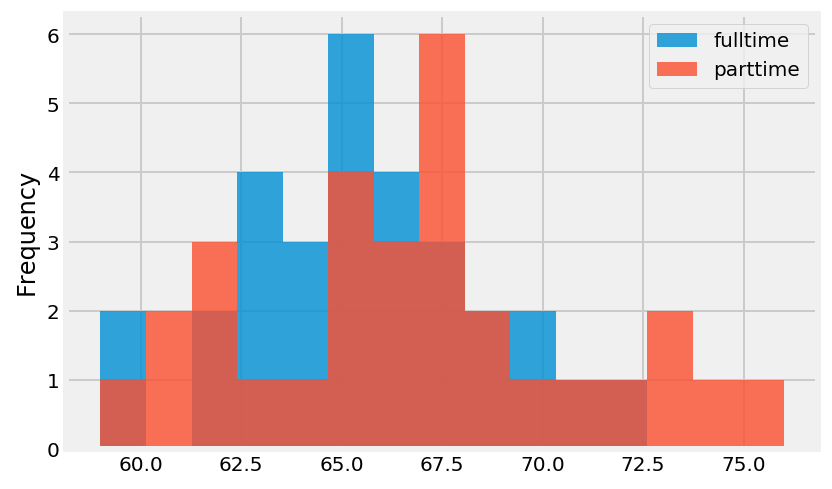

In [43]:
#historgram is helpful for comparing means
heights.plot(kind="hist", bins=15, alpha=0.8)

In [49]:
#mulitple assignment 
pets = ("cat", "dog")

favorite_pet = pet[0]
second_favorite = pet[1]
#this is a slow way to do this

#another way that is faster
favorite_pet, second_favorite = pets

NameError: name 'pet' is not defined

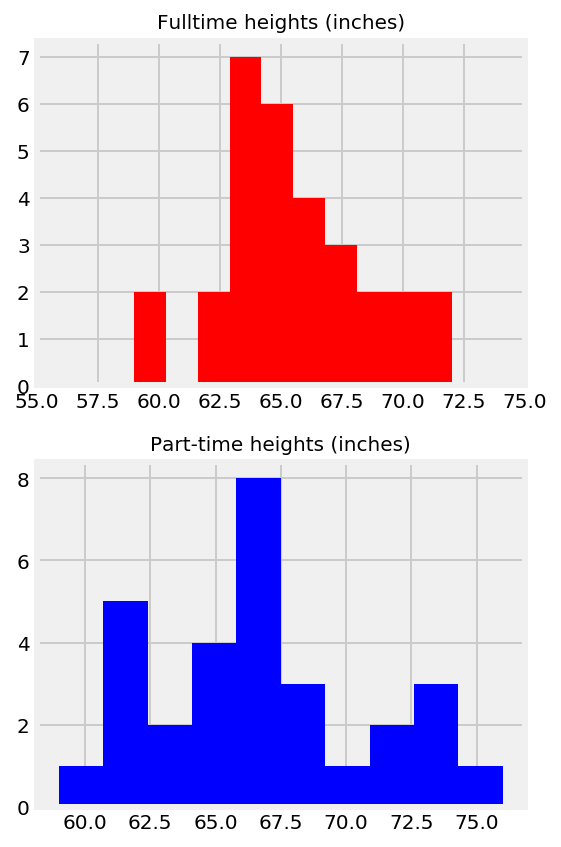

In [62]:
#granular way of doing things
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(4,6))

ax1.hist(fulltime, color ="red")
ax1.set_xlim(left=55, right=75)
ax1.set_title("Fulltime heights (inches)", size=10)


ax2.hist(parttime, color ="blue")
ax1.set_xlim(left=55, right=75)
ax2.set_title("Part-time heights (inches)", size=10)


plt.tight_layout()
plt.show()



Let's leverage inferential statistics.

### The "null hypothesis"

---

The **null hypothesis** is a fundamental concept of Frequentist statistical tests. We typically denote the null hypothesis with **H0**. 

In our GA height example, we can define our null hypothesis to be that there is no difference in mean height between part-time and full-time student populations.

> **H0:** The mean difference between groups is zero.

### The "alternative hypothesis"

---

The **alternative hypothesis** is the outcome of the experiment that we hope to show. In our example the alternative hypothesis is that there is in fact a mean difference in height. 

> **H1:** The parameter of interest, our mean difference between groups, is not zero.

**NOTE:** The null hypothesis and alternative hypothesis are concerned with the true values, or in other words the *parameter of the overall population*. Through the process of experimentation / hypothesis testing and statistical analysis of the results we will make an *inference* about this population parameter.

#### In our case:

H1: There is true difference in means between the heights of parttime and fulltime DS students at GA.

H0: There is no mean difference between heights between parttime and fulltime students.

In [63]:
# Performing a t-test using scipy

stats.ttest_ind(parttime, fulltime)
print("Our experiment (n=60) required in a t-value of {} \ and a p-value of {}.
      We failed to reject???")
#

Ttest_indResult(statistic=1.3512699109167094, pvalue=0.1818564355115328)

### <font color=blue>Check - </font> How do we interpret the p-value from this t-test?

If tere is no real difference in height, we would have an 18% chance of drawing wo samples witha mean differencof 1.3 inches or higher??? check file"


### <font color=blue>Discussion - </font> When I generated the data, I deliberately sampled it from two normal distributions with _different_ means. The null hypothesis was incorrect. Why couldn't we reject it?
- we couldnt reject it because ? 

### Which elements of an experiment minimize Type II error?
- big sample (as big as possible)<- this is what you can control
- size of the effect
-consistency of effect (expected variance)


<a id='ab-testing'></a>

### Introduction to A/B testing

---

You may have heard the term "A/B testing," or "split testing," before. Simply put, a split test is an experiment that tests different versions of your product with your users. Using these results, you as the data scientist will statistically analyze the experiment and determine a "winner" according to a pre-defined metric. 

**Example: Selling dog collars**

Picture this: You work for a startup that sells dog collars. Your web development team has constructed a prototype for a new "landing page" on the website (a landing page is the first page users reach when visiting a site). The designers are not sure whether a picture of a black lab wearing the collar or a golden retriever wearing the collar will have more of an impact on the click-through rate (the proportion of users who continue on to the the rest of the website). 

The team decides to run an A/B test to quantitatively evaluate which picture to choose.
- **Arm A** is the version of the landing page with the black lab.
- **Arm B** is the version of the landing page with the golden retriever.

For two weeks, users will be directed at random to one of the two landing pages with equal probability. At the end of this period, the click-through rates of each arm will be compared and one of the two will be "winnered."

Desiging and evaluating A/B tests like this one is one of the most common tasks a data scientist will be asked to perform.

**Below are the click-through rates per arm, measured at the end of two weeks.**

In [67]:
A_wins = 115
A_loss = 85
B_wins = 87
B_loss = 103

#% clicked is .52
#use it get the null table

<a id='ab-hypothesis'></a>

### Split Tests Are Hypothesis Tests

---

Despite the business jargon, **split tests are just experiments to test hypotheses.** Using the scenario above, we can frame the null hypothesis like so:

> **H0:** The difference in click-through rates between arms is 0.

The alternative hypothesis would be:

> **H1:** The difference in click-through rates between arms is not 0.

It's important that the users sent to each arm are selected at random. If user assignments are affected by external factors — such as whether they are viewing the site on web or mobile browsers — then the arms have **selection bias**.

**What is the problem with choosing a picture if users were not randomly assigned?**

<a id='chisq'></a>

### The $\chi^2$ (Chi-Squared) Test of Independence

---

A popular Frequentist method for evaluating A/B tests is the $\chi^2$ test of independence. The $\chi^2$ test of independence is appropriate when you have categorical data and want to evaluate whether or not two groups are significantly different. 

Click-through rate can be thought of as binary categorical data: A user either clicked through (1) or did not (0). 

"Independence" refers to whether or not the outcome for the groups (the click-through rate) is independent of group assignment. Independence would mean that there is no relationship between the dog picture and the click-through rate. 

You can conduct the $\chi^2$ test manually using what is known as a contingency table. For a detailed overview of the procedure, [this site](https://onlinecourses.science.psu.edu/stat500/node/56) is a good resource. In this course, we will use Python instead of manual calculation. That being said, it is important to address the formula for the $\chi^2$ statistic:

### $$ \chi^2 = \sum_{i=1}^{cells} \frac{(O_i - E_i)^2}{E_i} $$

Where: 

- $cells$ refers to the number of cells in the contingency table.
- $O$ are the observed values (frequencies).
- $E$ are the *expected* frequencies under perfect independence. 

**Using `stats.chi2_contingency`, calculate the $\chi^2$ statistic and the associated p-value for our split test.**

In [74]:
data = [[A_wins, A_loss],
         [B_wins, B_loss]] 

chi2_statistic, p_val, dof, contingency_table = stats.chi2_contingency(data)

In [78]:
# chi2_statistic
p_val

0.026966546110752252

In [1]:
# A:

**Explain what the p-value means in the context of our split test.**

In [79]:
# A:
If the landing photo did not affect click-through, 
we would expect a difference in click-through
counts this large 3% of the time. 

SyntaxError: invalid syntax (<ipython-input-79-104e6c0ca521>, line 2)

**Which arm is the "winner"? Should you choose to accept it as such? By how much?**

In [80]:
# A: Arm A is the winner by a reasonable amount. Seems worth
#a follow up study, or to permanetly change hte landing page right 
#off the bat??

<a id='significance'></a>

### Statistical Significance, P-Values, The Alpha Threshold, and Type I Errors

---

The split test has concluded and you have performed your statistical analysis of the results.
- **Arm A (the black lab picture) has a 23% higher click-through rate than Arm B (the golden retriever picture)**.
- **The p-value of our test was 0.044**.

Should we accept that the black lab picture is in fact more effective? Do we believe that the difference is real?

**Statistical Significance**

It's common to see Frequentist tests reported as "statistically significant with p < 0.05" or "with p < 0.01." So, what does it mean for a test to be statistically significant? On the surface, these statements are simply saying that the calculated p-value is less than a specific value. The values of 0.05 and 0.01 are common in academic research but also arbitrary. 

What does having "p < 0.05" specifically mean?

> **p < 0.05**: In hypothetical repetitions of this experiment with the same sample size, fewer than 5% of the experiments would have measured a difference between arms at least this extreme _by chance_.

The same goes for "p < 0.01." Here, however, it's framed in the context of null and alternative hypotheses:

> **p < 0.01**: There is less than a 1% chance of accepting the alternative hypothesis when the null hypothesis is in fact true. 

---

**Type I Errors and the Alpha Threshold ($\alpha$**)

As rigorous researchers, we would set a threshold for how likely we are to falsely accept the alternative hypothesis prior to running our experiment. This chance is known as a **type I error**.

Type I errors are directly related to the p-value. 

> **The p-value represents the risk of encountering a type I error, given the sample size and measured effect.**

It is important to set thresholds for type I errors before experiments begin. This prevents us from arbitrarily deciding whether or not we will accept an alternative hypothesis after we see a p-value.

The threshold we set for the type I error rate is denoted with `alpha`. For example:

- $\alpha$ = 0.05 corresponds to a "p < 0.05" significance level.
- $\alpha$ = 0.01 corresponds to a "p < 0.01" significance level.

**A Side Note on P-Value Thresholds:** 

"p < 0.01" is historically considered a "conservative" significance threshold. But it's actually not very conservative at all. 

This is, at worst, a 1/100 chance that an alternative hypothesis will be accepted when the result is in fact null. Now, think about all of the papers written and experiments run that have used a threshold of "p < 0.01" to validate their findings.


## Summary
----
- Frequentists frame an experimental question in terms of a null hypothesis and an alternative hypothesis.
    - The alternative hypothesis is the result you aim to support
    - The null hypothesis states the absence of an effect
- Use a t-test, or an ANOVA(F-test) for continuous data
- Use a chi-2 test of independence for for frequencies of categorical data
- We can implement hypothesis tests using `scipy.stats`
- When running a hypothesis test you run the risk of two types of errors:
 - **Type I**: Incorrectly reject the null hypothesis (false positive)
     - Alpha threshold is too high
     - Too many repeated experiments
 - **Type II**: Fail to reject the null hypothesis when it actually is false (false negative)